<a href="https://colab.research.google.com/github/neethak/FDP_DL-adishankara/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/FDP_DL@ASIET')

In [ ]:
pwd()

'/content/drive/MyDrive/FDP_DL@ASIET'

In [ ]:
from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import PIL
from PIL import Image


In [ ]:
!unzip '/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset.zip' -d '/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset'

Archive:  /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset.zip
   creating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/
   creating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: /content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: /content/drive/MyDrive/F

In [ ]:
imgFiles=glob.glob('/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/*/*jpg')


In [ ]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/FDP_DL@ASIET/Flower_dataset/tiny_FR/daisy/11642632_1e7627a2cc.jpg


In [ ]:
X=[]
Y=[]
for fName in imgFiles:
  X_i=Image.open(fName)
  X_i=X_i.resize((299,299))
  X_i=np.array(X_i) / 255.0
  X.append(X_i)
  label=fName.split("/")
  y_i=label[7]
  Y.append(y_i)

In [ ]:
print(Y)

['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandeli

In [ ]:
print(set(Y))

{'dandelion', 'daisy', 'sunflower', 'tulip', 'rose'}


In [ ]:
from sklearn.preprocessing import LabelEncoder
lEncoder=LabelEncoder()
y=lEncoder.fit_transform(Y)
print(y)
print(set(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
print(lEncoder.classes_)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(500, 299, 299, 3)
(500,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,Y_test=train_test_split(X,y,test_size=.2,stratify=y,random_state=42)
print(X_train.shape)

(400, 299, 299, 3)


In [ ]:
print(X_test.shape)

(100, 299, 299, 3)


In [ ]:
mu=X_train.mean()
std=X_train.std()

In [ ]:
X_train_std=(X_train-mu)/std
X_test_std=(X_test-mu)/std

Construct Network

In [ ]:
# Create the network using Functional API metho
input_ = keras.layers.Input(shape = X_train.shape[1:])
# Construct the convolution based preprocessing part (feature extractor) 
x = keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

# Construct the DNN classifier part

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1000, activation='relu')(x)
x = keras.layers.Dense(units=100, activation='relu')(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_CNN = keras.models.Model(inputs=[input_], outputs=[output_])

In [ ]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0     

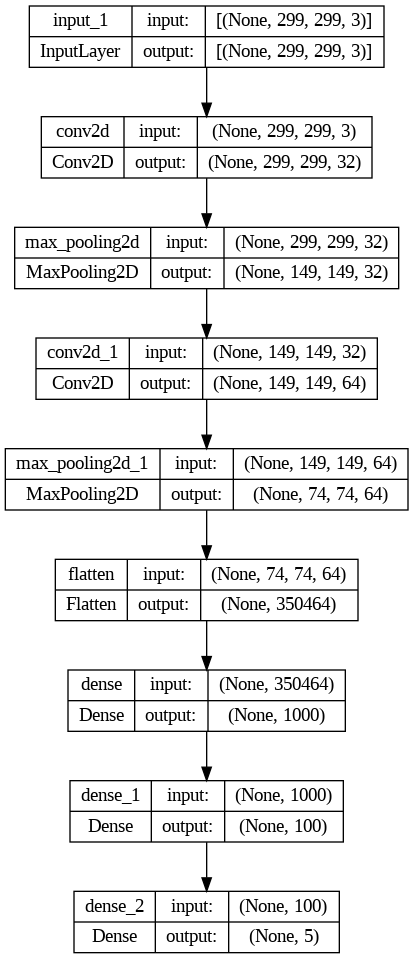

In [ ]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [ ]:
# Compile the network with appropriate settings for loss, optimizer and metrics.
model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

#Training the model. 
history_CNN = model_CNN.fit(x=X_train_std, 
                            y=y_train, 
                            epochs=25, 
                            validation_split=0.1, 
                            batch_size=32)

#history_cnn (dictionary) captures the loss and accuracy in ech epoch and stores 

Epoch 1/25
12/12 [==============================] - 12s 211ms/step - loss: 24.2795 - accuracy: 0.2556 - val_loss: 1.5454 - val_accuracy: 0.2000
Epoch 2/25
12/12 [==============================] - 2s 164ms/step - loss: 1.4469 - accuracy: 0.4528 - val_loss: 1.3826 - val_accuracy: 0.4750
Epoch 3/25
12/12 [==============================] - 2s 164ms/step - loss: 1.2474 - accuracy: 0.4806 - val_loss: 1.3046 - val_accuracy: 0.4000
Epoch 4/25
12/12 [==============================] - 2s 165ms/step - loss: 1.0979 - accuracy: 0.6389 - val_loss: 1.3427 - val_accuracy: 0.4250
Epoch 5/25
12/12 [==============================] - 2s 165ms/step - loss: 0.9161 - accuracy: 0.6611 - val_loss: 1.5297 - val_accuracy: 0.4000
Epoch 6/25
12/12 [==============================] - 2s 164ms/step - loss: 0.6643 - accuracy: 0.7917 - val_loss: 1.4142 - val_accuracy: 0.3750
Epoch 7/25
12/12 [==============================] - 2s 166ms/step - loss: 0.5054 - accuracy: 0.8194 - val_loss: 1.9761 - val_accuracy: 0.3750
Epoc

In [ ]:
history_CNN.history.items()

dict_items([('loss', [24.279495239257812, 1.4468753337860107, 1.247440218925476, 1.0978978872299194, 0.9161107540130615, 0.664289653301239, 0.5053543448448181, 0.3393692970275879, 0.34079521894454956, 0.2439267486333847, 0.1025351732969284, 0.04629845544695854, 0.01566091738641262, 0.00436068419367075, 0.001641079317778349, 0.000761279952712357, 0.00045398081419989467, 0.00034050847170874476, 0.0002702564524952322, 0.00021949195070192218, 0.00019271955534350127, 0.0001710086507955566, 0.00015398980758618563, 0.00013863419007975608, 0.0001275618706131354]), ('accuracy', [0.25555557012557983, 0.45277777314186096, 0.48055556416511536, 0.6388888955116272, 0.6611111164093018, 0.7916666865348816, 0.8194444179534912, 0.9027777910232544, 0.9166666865348816, 0.9555555582046509, 0.980555534362793, 0.9888888597488403, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), ('val_loss', [1.545407772064209, 1.3826247453689575, 1.3046118021011353, 1.3427402973175049, 1.5296980142593384, 1

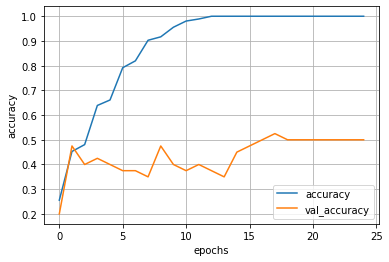

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:

# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(X_test_std, Y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 0s 93ms/step - loss: 3.4331 - accuracy: 0.4700
Test-loss: 3.433104, Test-accuracy: 0.470000


In [ ]:
cProba = model_CNN.predict(X_test_std[:10])

print(cProba)

1/1 [==============================] - 0s 356ms/step
[[9.8837602e-01 7.7485347e-05 1.4237119e-04 1.1403135e-02 9.5724613e-07]
 [9.3079299e-01 2.2688177e-03 6.6667847e-02 1.5457282e-04 1.1579078e-04]
 [2.8762003e-19 8.7758984e-20 1.0636342e-02 2.0883948e-12 9.8936367e-01]
 [8.9430241e-03 3.0702190e-02 9.3835545e-01 6.5884466e-04 2.1340471e-02]
 [5.0276572e-01 4.1943115e-01 7.8795897e-03 6.9899477e-02 2.4046516e-05]
 [2.6005250e-04 4.3075733e-02 4.6135939e-04 9.5359743e-01 2.6054764e-03]
 [5.1686715e-04 7.8982657e-01 6.5616413e-04 2.0804687e-01 9.5349387e-04]
 [4.7079411e-08 2.6804621e-05 3.0241215e-01 8.5012690e-09 6.9756103e-01]
 [6.7040312e-01 5.2599635e-02 1.0454232e-01 1.6432352e-01 8.1313923e-03]
 [6.6784577e-04 1.5476747e-01 3.9573607e-01 2.0420773e-02 4.2840785e-01]]


In [ ]:
cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

[0 0 4 2 0 3 1 4 0 4]


In [ ]:

print(Y_test[:10])

[2 3 2 0 0 3 1 2 3 4]
